### Probability Ratio Encoding

1. Probability of Survived based on Cabin--- Categorical Feature
2. Probability of Not Survived---1-pr(Survived)
3. pr(Survived)/pr(Not Survived)
4. replace with the categorical feature
5. replace with the categorical feature

import pandas as pd
df=pd.read_csv('Titanic-Train-Data.csv',usecols=['Survived','Cabin'])

In [1]:
import pandas as pd
df=pd.read_csv('Titanic-Train-Data.csv',usecols=['Cabin','Survived'])

df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [2]:
#first fill the missing values with some new value.
df['Cabin'].fillna('missing',inplace=True)

In [3]:
df.head()

,Survived,Cabin
0,0,missing
1,1,C85
2,1,missing
3,1,C123
4,0,missing


In [4]:
df['Cabin']=df['Cabin'].str[0]

In [5]:
df.head(3)

,Survived,Cabin
0,0,m
1,1,C
2,1,m


In [6]:
prob1=df.groupby(['Cabin'])['Survived'].mean()

In [7]:
df1=pd.DataFrame(prob1)

In [8]:
df1.head()

,Survived
Cabin,
A,0.466667
B,0.744681
C,0.593220
D,0.757576
E,0.750000


In [9]:
#to find out the unsurvived.
df1['unsurvived']=1-df1['Survived']

In [10]:
df1.head()

,Survived,unsurvived
Cabin,,
A,0.466667,0.533333
B,0.744681,0.255319
C,0.593220,0.406780
D,0.757576,0.242424
E,0.750000,0.250000


In [11]:
df1['proba_encoded']=df1['Survived']/df1['unsurvived']

In [12]:
df1['Survived']/df1['unsurvived']

Cabin
A    0.875000
B    2.916667
C    1.458333
D    3.125000
E    3.000000
F    1.600000
G    1.000000
T    0.000000
m    0.428274
dtype: float64

In [13]:
df1.head()

,Survived,unsurvived,proba_encoded
Cabin,,,
A,0.466667,0.533333,0.875000
B,0.744681,0.255319,2.916667
C,0.593220,0.406780,1.458333
D,0.757576,0.242424,3.125000
E,0.750000,0.250000,3.000000


In [14]:
probs=df1['proba_encoded'].to_dict()

In [15]:
#map it
df['cabin_encoded']=df['Cabin'].map(probs)

In [16]:
#df.drop('proba_encoded',axis=1,inplace=True)


### Transformation of Features

#### Why Transformation of Features Are Required?

1. Linear Regression---Gradient Descent ----Global Minima
2. Algorithms like KNN,K Means,Hierarichal Clustering--- Eucledian Distance
3. Every Point has some vectors and Directiom

4. Deep Learning Techniques(Standardization, Scaling) 1.ANN--->GLobal Minima, Gradient 2.CNN 3.RNN

   0-255 pixels

#### Types Of Transformation
1. Normalization And Standardization
2. Scaling to Minimum And Maximum values
3. Scaling To Median And Quantiles
4. Guassian Transformation 
        a. Logarithmic Transformation
        b. Reciprocal Trnasformation
        c. Square Root Transformation 
        d. Exponential Trnasformation
        e. Box Cox Transformation

#### Standardization
1. We try to bring all the variables or features to a similar scale.
2. standarisation means centering the variable at zero. z=(x-x_mean)/std

In [17]:
import pandas as pd

In [18]:
df=pd.read_csv('Titanic-Train-Data.csv',usecols=['Pclass','Age','Fare','Survived'])

In [19]:
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [20]:
#we can standardise 
#fit() is used for findout the parameters.
#fit_transform() it is used to find out the element and aswellas they converted the value into to one form to amother.


In [21]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [22]:
df1=scaler.fit_transform(df)

In [23]:
df=pd.DataFrame(df1)

In [24]:
df.head()

,0,1,2,3
0,-0.789272,0.827377,-0.530377,-0.502445
1,1.266990,-1.566107,0.571831,0.786845
2,1.266990,0.827377,-0.254825,-0.488854
3,1.266990,-1.566107,0.365167,0.420730
4,-0.789272,0.827377,0.365167,-0.486337


C:\Users\saika\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

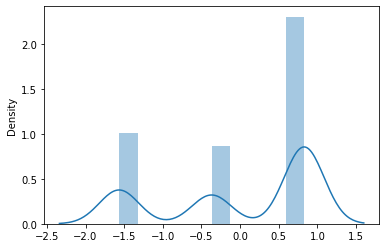

In [25]:
#to visualise the data.
import seaborn as sns
sns.distplot(df1[:,1])

C:\Users\saika\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

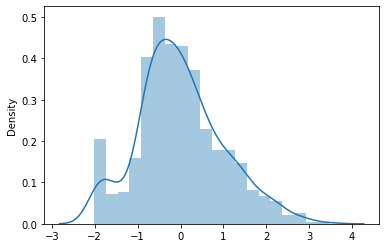

In [26]:
sns.distplot(df1[:,2]) #this is excatly normal distribution.

C:\Users\saika\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

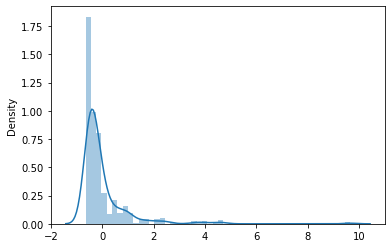

In [27]:
sns.distplot(df1[:,3])# right skewed distribution.

#### Min Max Scaling (### CNN)---Deep Learning Techniques
     Min Max Scaling scales the values between 0 to 1. X_scaled = (X - X.min / (X.max - X.min)

In [28]:
import pandas as pd

In [29]:
df=pd.read_csv('Titanic-Train-Data.csv',usecols=['Pclass','Age','Fare','Survived'])

In [30]:
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [31]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
df2=pd.DataFrame(mms.fit_transform(df),columns=df.columns)

In [32]:
df2.head()

,Survived,Pclass,Age,Fare
0,0.0,1.0,0.271174,0.014151
1,1.0,0.0,0.472229,0.139136
2,1.0,1.0,0.321438,0.015469
3,1.0,0.0,0.434531,0.103644
4,0.0,1.0,0.434531,0.015713


In [33]:
#to visualise the data.
import matplotlib.pyplot as plt
%matplotlib inline

(array([216.,   0.,   0.,   0.,   0., 184.,   0.,   0.,   0., 491.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

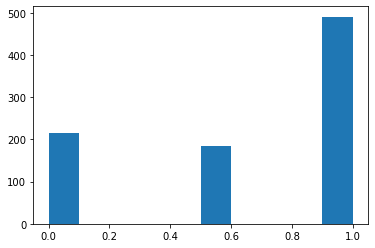

In [34]:
plt.hist(df2['Pclass'])

C:\Users\saika\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

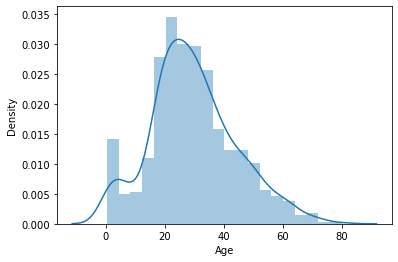

In [35]:
sns.distplot(df['Age'])

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

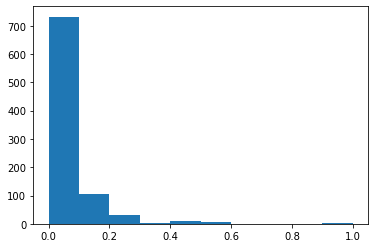

In [36]:
plt.hist(df2['Fare'])

#### Robust Scaler
 It is used to scale the feature to median and quantiles Scaling using median and quantiles consists of substracting the median to all the observations, and then dividing by the interquantile difference. The interquantile difference is the difference between the 75th and 25th quantile:

IQR = 75th quantile - 25th quantile

X_scaled = (X - X.median) / IQR

0,1,2,3,4,5,6,7,8,9,10

9-90 percentile---90% of all values in this group is less than 9 1-10 precentile---10% of all values in this group is less than 1 4-40%

In [37]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
df_robust_scaler=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df_robust_scaler.head()

,Survived,Pclass,Age,Fare
0,0.0,0.0,-0.335664,-0.312011
1,1.0,-2.0,0.559441,2.461242
2,1.0,0.0,-0.111888,-0.282777
3,1.0,-2.0,0.391608,1.673732
4,0.0,0.0,0.391608,-0.277363


(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([-1.54293706, -1.09773427, -0.65253147, -0.20732867,  0.23787413,
         0.68307692,  1.12827972,  1.57348252,  2.01868531,  2.46388811,
         2.90909091]),
 <BarContainer object of 10 artists>)

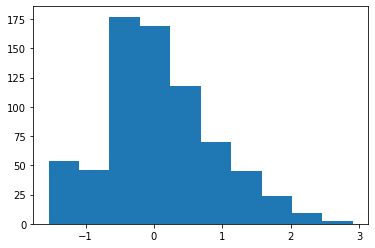

In [39]:
plt.hist(df_robust_scaler['Age'])

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([-0.62600478,  1.59286952,  3.81174382,  6.03061811,  8.24949241,
        10.46836671, 12.68724101, 14.90611531, 17.12498961, 19.3438639 ,
        21.5627382 ]),
 <BarContainer object of 10 artists>)

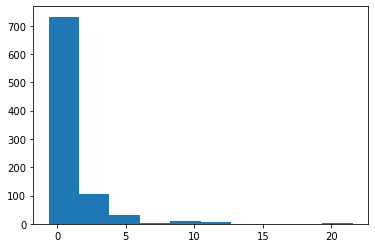

In [40]:
plt.hist(df_robust_scaler['Fare'])

(array([216.,   0.,   0.,   0.,   0., 184.,   0.,   0.,   0., 491.]),
 array([-2. , -1.8, -1.6, -1.4, -1.2, -1. , -0.8, -0.6, -0.4, -0.2,  0. ]),
 <BarContainer object of 10 artists>)

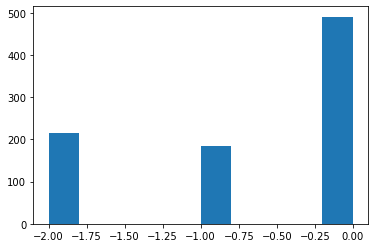

In [41]:
plt.hist(df_robust_scaler['Pclass'])

#### Guassian Transformation
- a. Logarithmic Transformation
- b. Reciprocal Trnasformation
- c. Square Root Transformation 
- d. Exponential Trnasformation
- e. Box Cox Transformation

In [62]:
data=pd.read_csv('Titanic-Train-Data.csv',usecols=['Pclass','Age','Fare','Survived'])

In [63]:
data.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [64]:
data['Age'].fillna(data['Age'].median(),inplace=True)

In [65]:
data['Age'].median()

28.0

In [66]:
data.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

##### Some machine learning algorithms like linear and logistic assume that the features are normally distributed -Accuracy -Performance

In [67]:
#### If you want to check whether feature is guassian or normal distributed
#### Q-Q plot

In [71]:
import scipy.stats as stat
import pylab

In [83]:
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    plt.hist(df[feature])
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

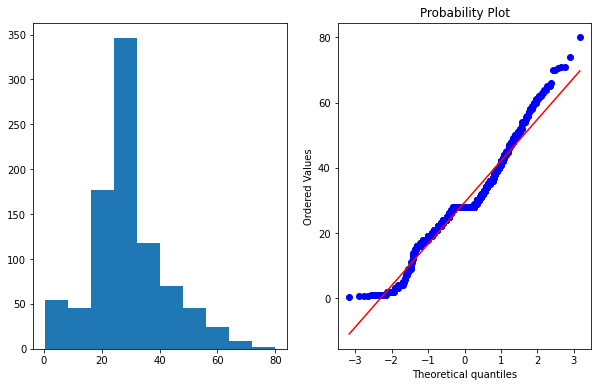

In [84]:
plot_data(data,'Age') #when all the points lie on the stright line then it is called as a gussian distribution.

#### Logarithmic Transformation

In [85]:
#first we use logarithmic transformtion for converting normal distribution.
import numpy as np

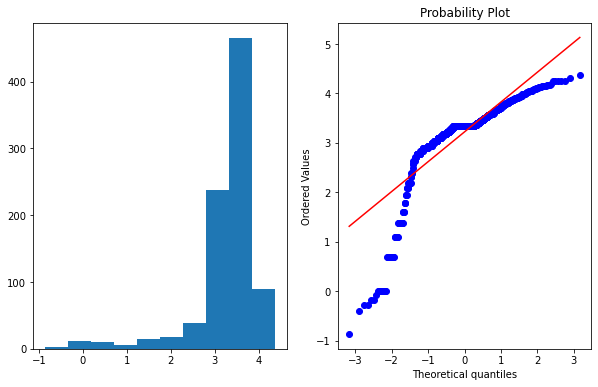

In [86]:
data['Age_log']=np.log(data['Age'])
plot_data(data,'Age_log') #this is also not enough.try next one.

### Reciprocal Trnasformation

In [88]:
data['Age_reci']=1/data['Age']

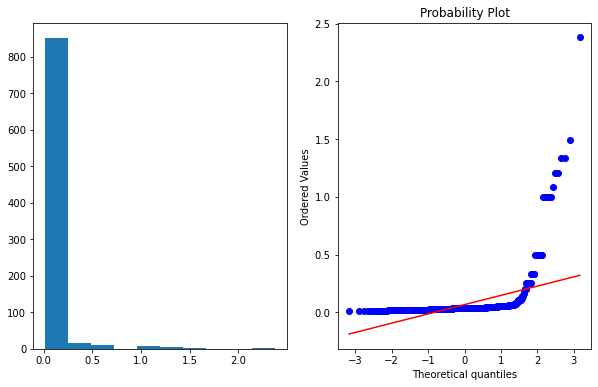

In [89]:
plot_data(data,'Age_reci') #this is also failed.

#### Square Root Transformation

In [90]:
data['Age_square']=data['Age']**(1/2)

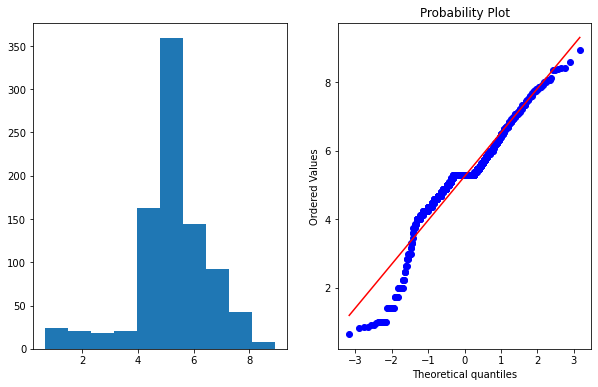

In [91]:
plot_data(data,'Age_square') #this is also failed.

#### Exponential Transdormation


In [99]:
data['Age_exp']=data.Age**(1/1.2)

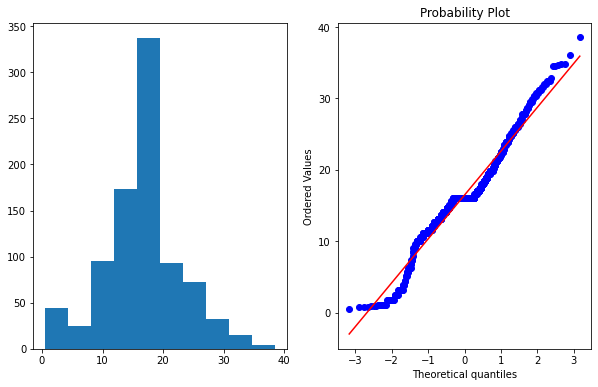

In [100]:
plot_data(data,'Age_exp')

#### BoxCOx Transformation
  The Box-Cox transformation is defined as:

  T(Y)=(Y exp(λ)−1)/λ

1. where Y is the response variable and λ is the transformation parameter.
2. λ varies from -5 to 5. In the transformation, all values of λ are considered and the optimal value for a given variable is selected.

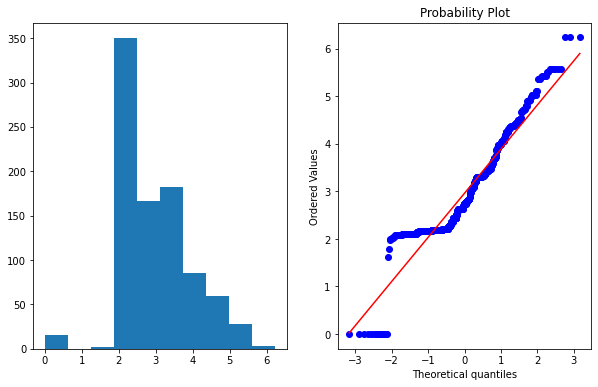

In [104]:
# now we check for fare.
data['Fare_log']=np.log1p(data['Fare'])
plot_data(data,'Fare_log') #og1p () function computes the value of log (1+x) accurately even for tiny argument x.
# when your data is in the right skewed we use logarithmic transformation.   